In [67]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)
from matplotlib.pyplot import cm 
from IPython.display import Image, display
import grass.script as gscript

Compute difference 3D raster and query in predefined places:

In [68]:
gscript.run_command('g.region', raster3d='map3d_3760', overwrite=True)
gscript.run_command('r3.mapcalc', expression='map3d_37601_diff = map3d_3760 - map3d_3761', overwrite=True)
gscript.run_command('r3.what', overwrite=True, input='map3d_3761', points='POI',
                    output='POI_before.csv', separator='comma', null_value='0')
gscript.run_command('r3.what', overwrite=True, input='map3d_3760', points='POI',
                    output='POI_after.csv', separator='comma', null_value='0')
gscript.run_command('r3.what', overwrite=True, input='map3d_37601_diff', points='POI',
                    output='POI_diff.csv', separator='comma', null_value='0')

0

In [69]:
data_diff = np.loadtxt('POI_diff.csv', delimiter=',')
data_before = np.loadtxt('POI_before.csv', delimiter=',')
data_after = np.loadtxt('POI_after.csv', delimiter=',')

Load values and convert to number of people per 100 m$^2$ per 1 hour

In [70]:

POI = gscript.read_command('v.out.ascii', input='POI', columns='cat,name', format='point').strip()
POI_data_diff = {}
POI_data_before = {}
POI_data_after = {}
for line in POI.splitlines():
    x, y, cat, name = line.split('|')
    x = float(x)
    y = float(y)
    for line in data_diff:
        if abs(line[0] - x) < 1e-3 and abs(line[1] - y) < 1e-3:
            POI_data_diff[name] = 8 *line[2:] # 8 - from 5m x 5m x 30 min to 10m x 10m x 1h
            
    for line in data_before:
        if abs(line[0] - x) < 1e-3 and abs(line[1] - y) < 1e-3:
            POI_data_before[name] = 8 *line[2:] # 8 - from 5m x 5m x 30 min to 10m x 10m x 1h
            
    for line in data_after:
        if abs(line[0] - x) < 1e-3 and abs(line[1] - y) < 1e-3:
            POI_data_after[name] = 8 *line[2:] # 8 - from 5m x 5m x 30 min to 10m x 10m x 1h

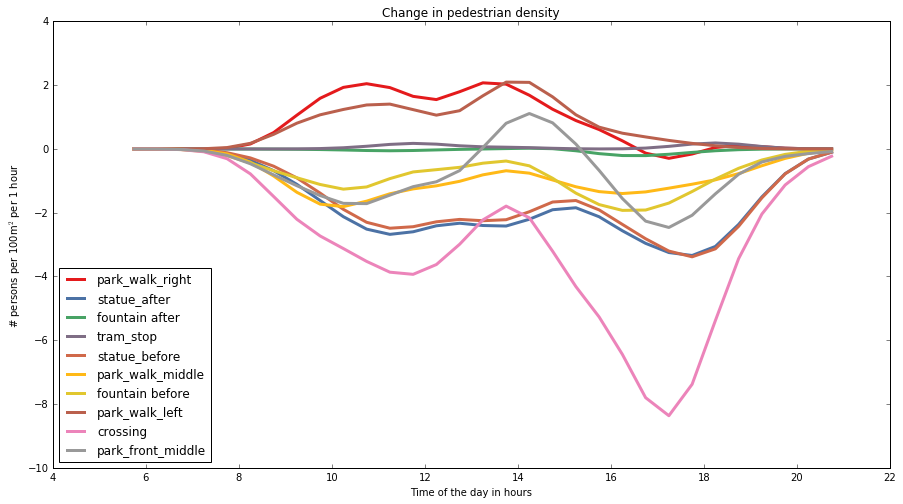

In [71]:
time = np.arange(345, 1260, 30) / 60.
color=iter(cm.Set1(np.linspace(0, 1, len(POI_data_diff))))
keys =  POI_data_diff.keys()
for key in keys:
    c = next(color)
    plt.plot(time, POI_data_diff[key], c=c, linewidth=3, label=key)
plt.legend(loc=0)
plt.title("Change in pedestrian density")
plt.ylabel("# persons per 100m$^2$ per 1 hour")
plt.xlabel("Time of the day in hours")
plt.show()

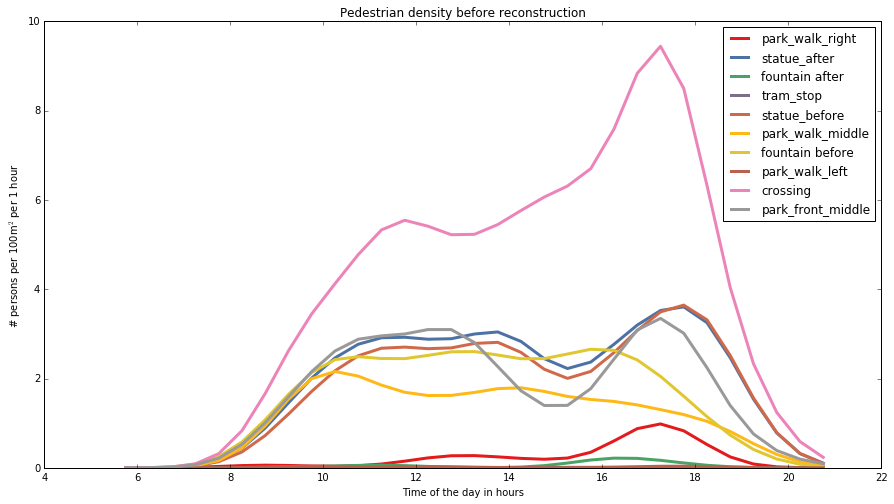

In [72]:
color=iter(cm.Set1(np.linspace(0, 1, len(POI_data_before))))
for key in keys:
    c = next(color)
    plt.plot(time, POI_data_before[key], c=c, linewidth=3, label=key)
plt.legend(loc=0)
plt.title("Pedestrian density before reconstruction")
plt.ylabel("# persons per 100m$^2$ per 1 hour")
plt.xlabel("Time of the day in hours")
plt.ylim(0, 10)
plt.show()

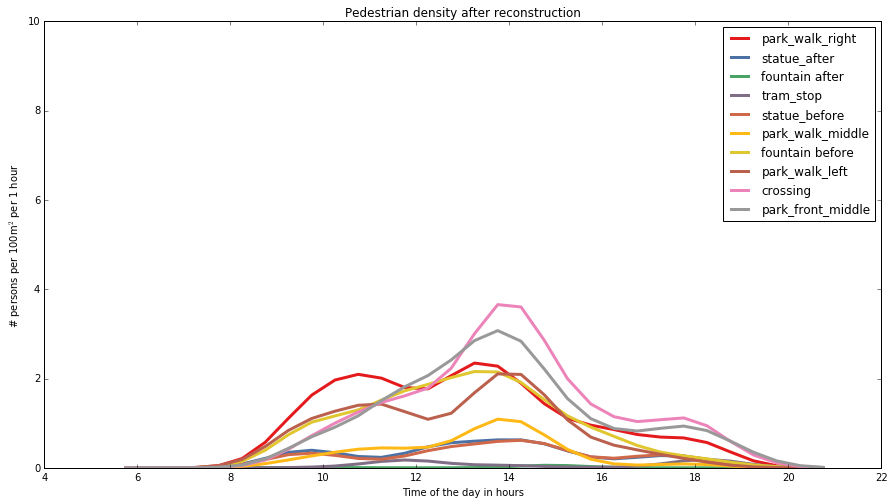

In [73]:
color=iter(cm.Set1(np.linspace(0, 1, len(POI_data_after))))
for key in keys:
    c = next(color)
    plt.plot(time, POI_data_after[key], c=c, linewidth=3, label=key)
plt.legend(loc=0)
plt.title("Pedestrian density after reconstruction")
plt.ylabel("# persons per 100m$^2$ per 1 hour")
plt.xlabel("Time of the day in hours")
plt.ylim(0, 10)
plt.show()

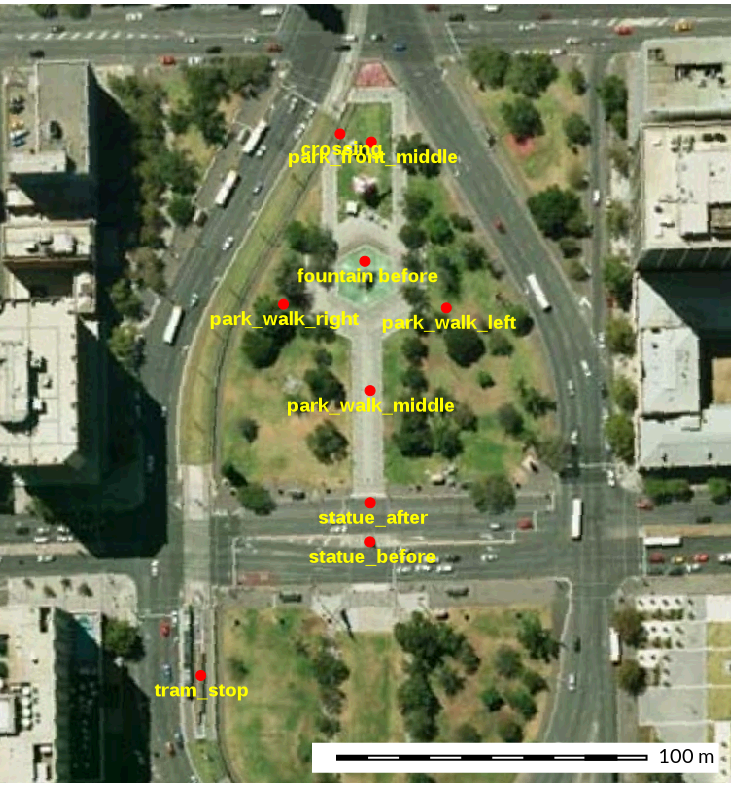

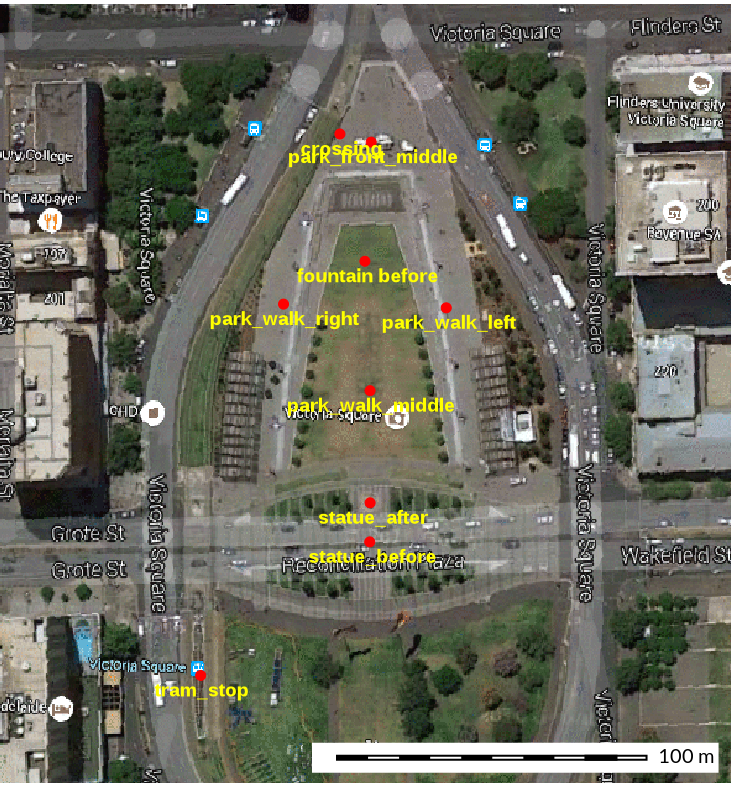

In [74]:
display(Image(filename='POI_before.png'))
display(Image(filename='POI_after.png'))